In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [3]:
# K-Means clustering algorithm
def k_means(X, k, max_iters=100):
    # Step 1: Initialize k random centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Step 2: Assign each data point to the nearest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        
        # Step 3: Calculate new centroids as the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Print distances between each data point and each centroid
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            print(f"Point {i} distances to centroids: {distances}")
        
        # Step 4: If centroids don't move, finish the algorithm
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, labels

In [4]:
# Generate a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Save the initial dataset to CSV
initial_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
initial_df['Cluster'] = y 
initial_df.to_csv('initial_dataset.csv', index=False)

In [5]:
# Run the K-Means algorithm with 4 clusters
k = 4
centroids, labels = k_means(X, k)

# Save the clustered dataset to CSV
clustered_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
clustered_df['Cluster'] = labels 
clustered_df.to_csv('clustered_dataset.csv', index=False)

Point 0 distances to centroids: [15.191389790104841, 14.426761441961077, 1.8745751689167198, 8.220899523877161]
Point 1 distances to centroids: [15.702055154211054, 14.981668222148002, 2.4883491935291158, 8.453975122449057]
Point 2 distances to centroids: [8.785333610368768, 15.75923993729371, 6.867251736105826, 1.5523744328307463]
Point 3 distances to centroids: [15.027752888196721, 2.256842292029903, 10.931796865175954, 16.094571177444]
Point 4 distances to centroids: [16.686298034805972, 14.761600728646041, 3.109671342770133, 9.763917380328893]
Point 5 distances to centroids: [14.925880983820493, 0.6022552231892587, 12.313800500962385, 16.970980931136005]
Point 6 distances to centroids: [0.6166475248186329, 14.321483451978944, 13.114388624947145, 9.477960516564245]
Point 7 distances to centroids: [15.52618504452936, 0.8651816983429295, 12.650579713498354, 17.479822868875708]
Point 8 distances to centroids: [10.447528727959016, 16.5085099330903, 6.246307854814685, 1.4864255609895574]

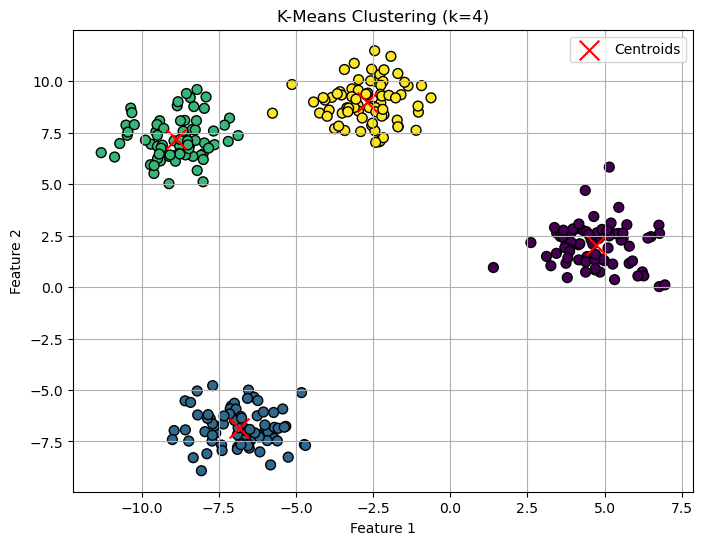

In [7]:
# Visualize the data points and the centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()